In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(44)

In [19]:
df = pd.read_csv('data/data.csv', header=None)

In [20]:
df.columns = ['X1', 'X2', 'y']
X = df[['X1','X2']]
y = df['y']
X = np.array(X)
y = np.array(y)

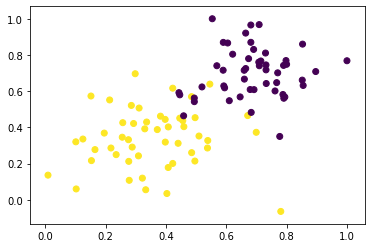

In [32]:
plt.scatter(df.X1, df.X2, c=df.y);

Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Prediction formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Binary Cross Entropy function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [53]:
def predict(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(y, pred):
    return -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))

def update_weights(x, y, weights, bias, learn_rate=0.01):
    predictions = predict(x, weights, bias)
    error = y - predictions
    weights += learn_rate*(error)*x
    bias  += learn_rate*(error)
    return weights, bias 

## For plotting lines
def display(m, b, color='g--', lw=1):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color, linewidth=lw)

In [72]:
def train(features, targets, epochs, learnrate):
    
    ## Initialize weights randomly 
    weights = np.random.randn(2)
    bias = 0
    errors = []
    
    for epoch in range(epochs):
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        predictions = predict(features, weights, bias)
        loss = cross_entropy(targets, predictions)
        pred_class = predictions>0.5
        accuracy = np.mean(pred_class == targets)
        errors.append(loss)
        if epoch%10 == 0:
            print("------Epoch {} ------ Accuracy : {}, Loss : {}".format(epoch, accuracy, loss))
            display(-weights[0]/weights[1], -bias/weights[1])
    
    
    # Plotting the solution boundary
    plt.title("Decision boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black', 3)

    # Plotting the data
    plt.scatter(features[:,0],features[:,1], c=targets)
    plt.show()
    
    
    plt.title("Error Plot") 
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(errors)
    plt.show()

------Epoch 0 ------ Accuracy : 0.42, Loss : 0.7544328476908977
------Epoch 10 ------ Accuracy : 0.51, Loss : 0.641047736613851
------Epoch 20 ------ Accuracy : 0.7, Loss : 0.5695531499845956
------Epoch 30 ------ Accuracy : 0.82, Loss : 0.5133739332643805
------Epoch 40 ------ Accuracy : 0.88, Loss : 0.4689541770820771
------Epoch 50 ------ Accuracy : 0.93, Loss : 0.43327403357916
------Epoch 60 ------ Accuracy : 0.92, Loss : 0.40414728011707796
------Epoch 70 ------ Accuracy : 0.92, Loss : 0.3800042088579306
------Epoch 80 ------ Accuracy : 0.93, Loss : 0.35971062216092775
------Epoch 90 ------ Accuracy : 0.93, Loss : 0.34243715665761326


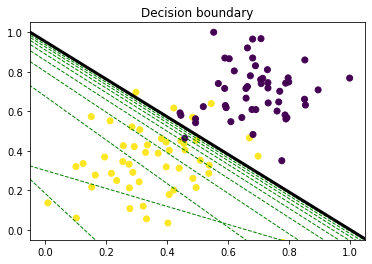

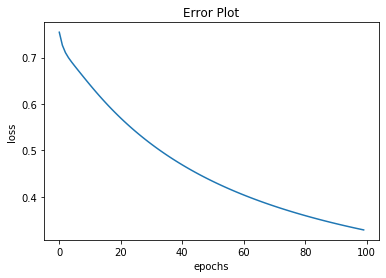

In [73]:
train(X, y, 100, learnrate=0.01)